In [1]:
import numpy as np
import pandas as pd


In [27]:
df = pd.read_csv('/content/placement-dataset.csv')

In [37]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [47]:
df.shape

(100, 3)

Preprocess

In [31]:
df= df.iloc[:,1:]

In [41]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [42]:
import matplotlib.pyplot as plt

In [43]:
print(df.columns.tolist())
print("cgpa" in df.columns)


['cgpa', 'iq', 'placement']
True


In [44]:
df = df[["cgpa", "iq", "placement"]]

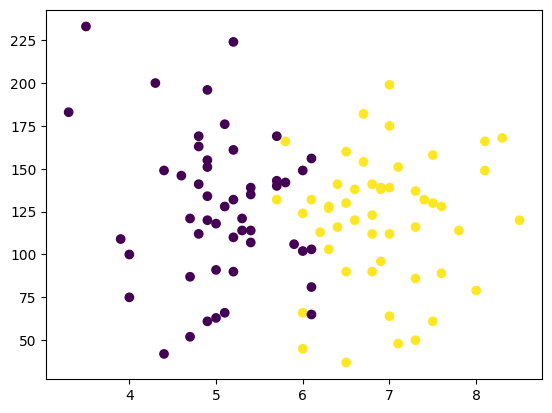

In [46]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [48]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [50]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [52]:
y.shape

(100,)

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [54]:
X_train

,cgpa,iq
86,5.1,128.0
77,7.3,50.0
49,5.4,135.0
19,5.2,132.0
88,4.4,149.0
...,...,...
9,5.1,66.0
79,6.5,90.0
45,6.0,66.0
85,5.8,166.0


In [55]:
y_train

,placement
86,0
77,1
49,0
19,0
88,0
...,...
9,0
79,1
45,1
85,1


In [56]:
X_test

,cgpa,iq
20,6.6,120.0
82,6.5,37.0
23,4.7,87.0
98,6.3,103.0
24,4.7,121.0
30,7.6,128.0
1,5.9,106.0
4,5.8,142.0
25,5.0,91.0
61,7.3,137.0


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [60]:
X_train = scaler.fit_transform(X_train)

In [61]:
X_train

array([[-0.76662228,  0.06444881],
       [ 1.13790985, -1.86901558],
       [-0.50691335,  0.23796485],
       [-0.68005263,  0.16360083],
       [-1.37260977,  0.58499692],
       [-0.93976156,  0.63457293],
       [ 1.83046699,  1.00639301],
       [ 0.79163128,  0.31232886],
       [ 0.87820093, -1.52198351],
       [ 0.09907415,  0.16360083],
       [ 0.0125045 , -0.03470321],
       [ 2.00360627,  1.05596902],
       [-0.93976156,  1.75003316],
       [ 0.09907415,  0.75851296],
       [ 0.0125045 , -1.99295561],
       [-0.24720442,  1.08075702],
       [-0.93976156,  0.73372495],
       [ 2.17674556, -0.13385523],
       [ 0.618492  ,  1.40300109],
       [-0.24720442,  0.36190487],
       [ 1.13790985, -0.23300725],
       [ 0.70506164, -0.87749538],
       [-2.15173655,  2.66718935],
       [ 0.87820093, -0.33215927],
       [ 0.53192236,  0.31232886],
       [ 0.96477057, -1.91859159],
       [-0.24720442,  0.43626889],
       [-2.32487583,  1.42778909],
       [ 0.18564379,

In [62]:
X_test = scaler.transform(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [63]:
X_test

array([[  6.6, 120. ],
       [  6.5,  37. ],
       [  4.7,  87. ],
       [  6.3, 103. ],
       [  4.7, 121. ],
       [  7.6, 128. ],
       [  5.9, 106. ],
       [  5.8, 142. ],
       [  5. ,  91. ],
       [  7.3, 137. ]])

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
clf = LogisticRegression()

In [66]:
clf.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred = clf.predict(X_test)

In [68]:
y_test

,placement
20,1
82,1
23,0
98,1
24,0
30,1
1,0
4,0
25,0
61,1


In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test,y_pred)

0.5

In [71]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

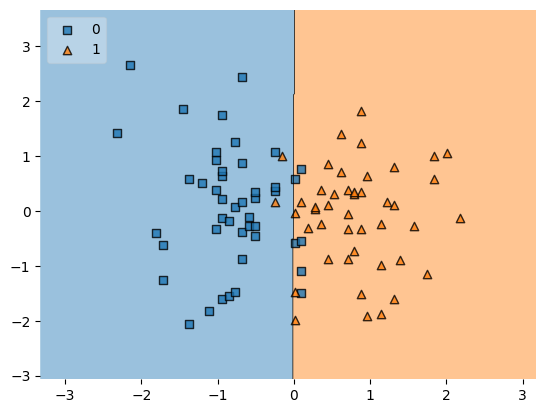

In [72]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [73]:
import pickle

In [75]:
pickle.dump(clf,open('model.pkl','wb'))

In [76]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>